In [38]:
using Statistics, LinearAlgebra, Plots, MAT

In [41]:
Gamma =[[1.0, 0.001], [1.0, 0.5], [0.001, 1.0], [0.5, 1.0]]

4-element Vector{Vector{Float64}}:
 [1.0, 0.001]
 [1.0, 0.5]
 [0.001, 1.0]
 [0.5, 1.0]

In [43]:
rep = 200
alpha = repeat([1 2], rep, 1)
theta = repeat([2 -1], rep, 1)
beta = repeat([1 -0.5], rep, 1)

g1 = repeat(Gamma[1] |> transpose, rep, 1)
g2 = repeat(Gamma[2] |> transpose, rep, 1)
g3 = repeat(Gamma[3] |> transpose, rep, 1)
g4 = repeat(Gamma[4] |> transpose, rep, 1)


200×2 Matrix{Float64}:
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 ⋮    
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0

In [44]:
vars32 = matread("./simulations/records/300 f2 d0 0.5 1.0.mat")
vars31 = matread("./simulations/records/300 f1 d0 0.5 1.0.mat")

Dict{String, Any} with 4 entries:
  "Beta"  => [-0.503891 1.42311; -4.74155 -8.12226; … ; 0.979201 -4.13511; -0.4…
  "Gamma" => [0.294846 0.509434; 0.406357 0.692969; … ; 0.562464 0.59112; -0.02…
  "Theta" => [1.77445 -0.864202; 3.46787 -1.21906; … ; 2.53297 -1.33162; 2.6306…
  "Alpha" => [0.437858 0.899044; 0.331637 0.943407; … ; 0.46533 0.885137; 0.258…

In [45]:
vars62 = matread("./simulations/records/600 f2 d0 0.5 1.0.mat")
vars61 = matread("./simulations/records/600 f1 d0 0.5 1.0.mat")

Dict{String, Any} with 4 entries:
  "Beta"  => [-3.75348 -0.301782; 2.45741 -2.00343; … ; -0.619923 -0.859564; -1…
  "Gamma" => [0.177335 0.343082; 0.157668 0.394806; … ; 0.261718 0.39786; 0.112…
  "Theta" => [1.31911 -0.991539; 1.83622 -0.926093; … ; 2.27047 -1.05452; 2.118…
  "Alpha" => [0.600854 0.799358; 0.450317 0.892869; … ; 0.421233 0.906952; 0.43…

In [46]:
a31 = vars31["Alpha"]
b31 = vars31["Beta"]
t31 = vars31["Theta"]
g31 = vars31["Gamma"]

a32 = vars32["Alpha"]
b32 = vars32["Beta"]
t32 = vars32["Theta"]
g32 = vars32["Gamma"]

a61 = vars61["Alpha"]
b61 = vars61["Beta"]
t61 = vars61["Theta"]
g61 = vars61["Gamma"]

a62 = vars62["Alpha"]
b62 = vars62["Beta"]
t62 = vars62["Theta"]
g62 = vars62["Gamma"]

200×2 Matrix{Float64}:
 0.122113   0.306387
 0.221134   0.374024
 0.212767   0.359329
 0.0408508  0.359862
 0.106248   0.415273
 0.188945   0.34723
 0.149963   0.304485
 0.249559   0.354169
 0.123789   0.351141
 0.139557   0.338128
 0.229472   0.317893
 0.308338   0.322756
 0.230601   0.364695
 ⋮          
 0.245831   0.276672
 0.22331    0.37159
 0.108276   0.288252
 0.221067   0.38186
 0.199491   0.412705
 0.0465988  0.354212
 0.183408   0.427036
 0.129909   0.365653
 0.258905   0.524099
 0.187476   0.596444
 0.166932   0.388079
 0.2068     0.32575

In [60]:
function hplot(x)
    p1 = histogram(x[:,1], bins = -1:0.1:3, label = "g1")
    p2 = histogram(x[:,2], bins = -1:0.1:3, label = "g2")
    plot(p1, p2, layout = (1, 2))
end

function mean2d(x)
    println(mean(x, dims = 1))
end

mean2d (generic function with 1 method)

[2.0100570405718976 -3.960950532429614]


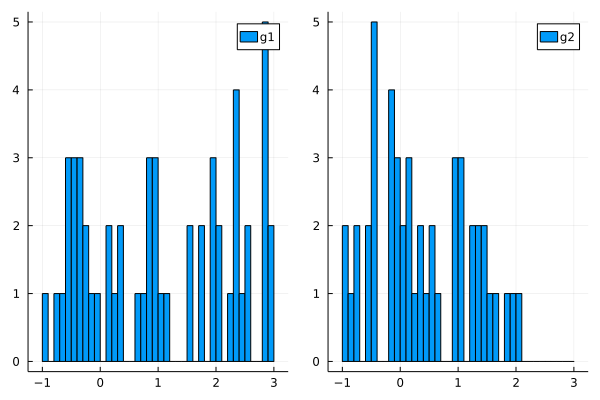

In [61]:
mean2d(b31)
hplot(b31)

[-0.62474192322224 -0.831218989584097]


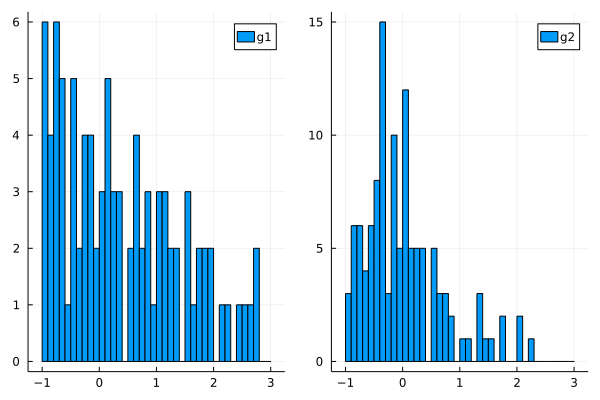

In [62]:
mean2d(b61)
hplot(b61)

[0.6884656105308699 -0.3166033773334122]


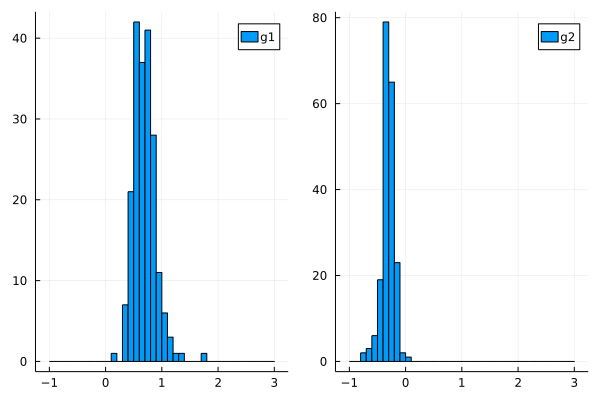

In [63]:
mean2d(b32)
hplot(b32)

[0.5675804522741253 -0.21454542231795407]


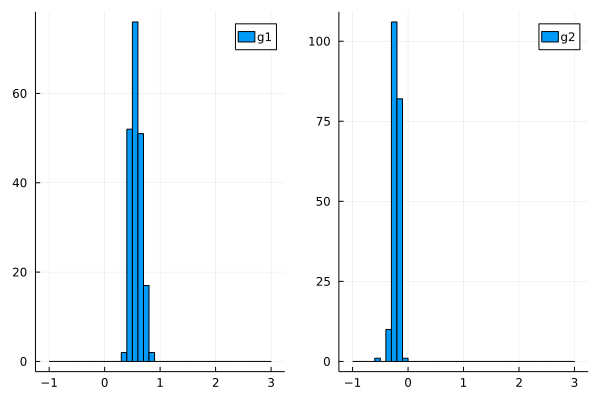

In [64]:
mean2d(b62)
hplot(b62)

[0.28049737489029875 0.5724213751610682]


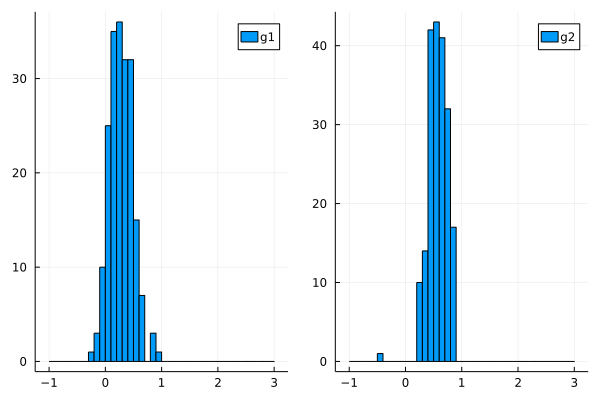

In [65]:
mean2d(g31)
hplot(g31)

[0.1778713766780892 0.3606863788820749]


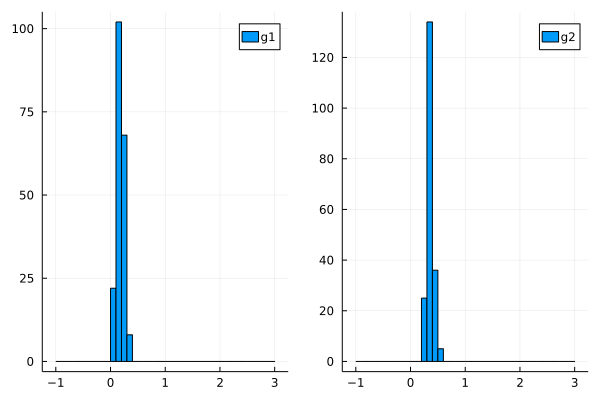

In [66]:
mean2d(g61)
hplot(g61)

[0.2719579900737266 0.5565312095548212]


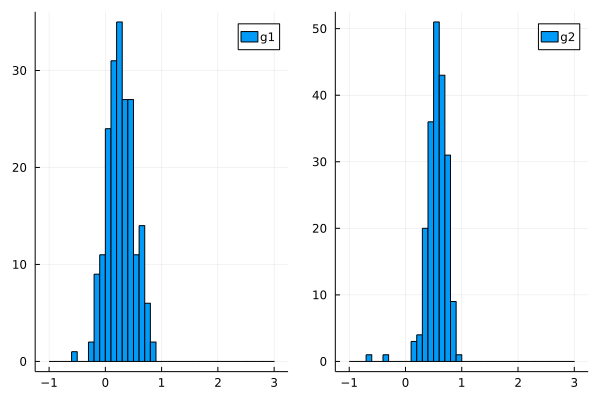

In [67]:
mean2d(g32)
hplot(g32)

[0.1880887348354297 0.3676344922591445]


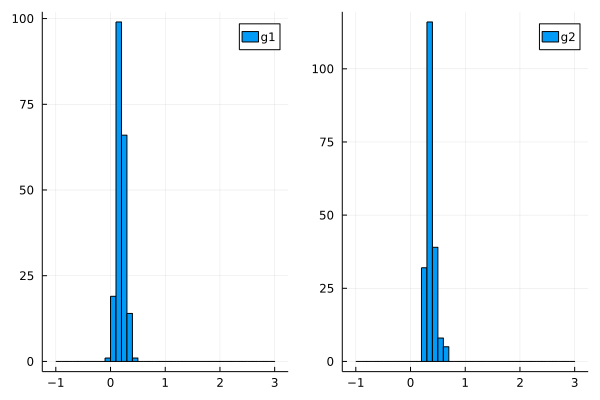

In [68]:
mean2d(g62)
hplot(g62)